## File 2: Relationship between Mass-Radius-Temperature
Mass - radius - temperature 


From Laughlin & Lissauer (2015) and  S. Seager (2011):
$$
T_{\mathrm{eq}}=[f(1-A)]^{1/4} \left(\frac{R_{\star}}{2 a}\right)^{1 / 2} \frac{T_{\star}}{\left(1-e^{2}\right)^{1 / 8}}
$$
Params meeded: $R_{\star}, a, T_{\star}, e$

In [16]:
%run scripts.py

In [17]:
param_Teff=['obj_phys_mass_mjup', 'obj_phys_radius_rjup',
           'obj_parent_phys_teff_k','obj_orb_ecc','obj_orb_a_au','obj_parent_phys_radius_rsun']

d_US_MRT, d_EU_MRT = read_file(file_US, param_Teff), read_file(file_EU, param_Teff)

In [18]:
d_US_MRT = add_temp_eq_dataset(d_US_MRT)
d_US_MRT = add_temp_eq_dataset(d_EU_MRT)

/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


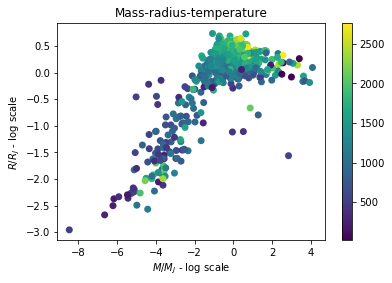

In [19]:
d_US_MRT=d_US_MRT[['obj_phys_mass_mjup','obj_phys_radius_rjup','temp_eq']]
kmeans = KMeans(n_clusters=3).fit(np.log(d_US_MRT))
centroids, labels = kmeans.cluster_centers_, kmeans.labels_
colors = ['r','b','c']

M_US, R_US, Teq_US = d_US_MRT['obj_phys_mass_mjup'], d_US_MRT['obj_phys_radius_rjup'], d_US_MRT['temp_eq']
c1 = plt.cm.BuPu((Teq_US-np.min(Teq_US))/np.ptp(Teq_US))
plt.scatter(np.log(M_US), np.log(R_US), c = Teq_US, s=30, linewidths=1.5, marker='o')
plt.xlabel(r"$M/M_J$ - log scale")
plt.ylabel(r"$R/R_J$ - log scale")
plt.title(r"Mass-radius-temperature")
plt.colorbar()
plt.show()